In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,Y = make_blobs(n_samples=500,centers=2,n_features=2,random_state=11)

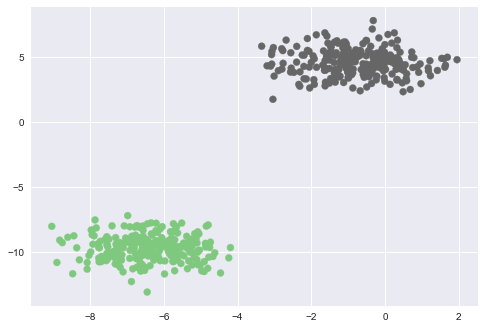

In [3]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [4]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [5]:
def predict(X,weights):
    z  = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

In [6]:
def loss(X,Y,weights):
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

In [7]:
def update(X,Y,weights,learning_rate): # Weight Updates for 1 epoch
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

In [20]:
def train(X,y,learning_rate=0.5,maxEpochs=1000):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    weights = np.zeros(X.shape[1]) #n+1 entries
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights

In [ ]:
weights = train(X,Y)

In [26]:
def getPredictions(X_Test,weights,labels=True):
    if(X_Test.shape[1] !=weights.shape[0]):
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
        probs = predict(X_Test,weights)
        if not labels:
            return probs
        else:
            labels = np.zeros(probs.shape)
            labels[probs>=0.5] = 1
            return labels

In [27]:
x1 = np.linspace(-8,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

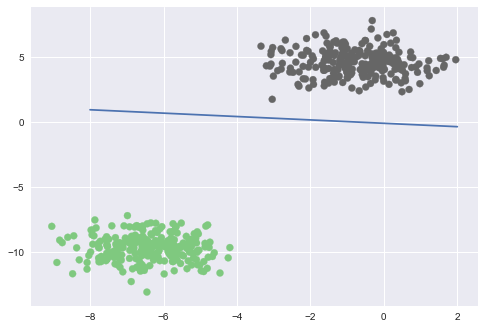

In [28]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2)
plt.show()

In [29]:
Y_ = getPredictions(X,weights,labels=True)
np.sum(Y_==Y)/Y.shape[0]

1.0